# Preliminaries

In [1]:
using SHA
using DataFrames
using CSV
using Plots
using StatsBase
using Arrow

# 1 

**Use the "Sales_Transactions_Dataset_Weekly.csv" file from the UCI repository. You can learn more about the dataset under “Sales_Transactions_Dataset_Weekly Data Set”.**

The [`download()` function](https://docs.julialang.org/en/v1/stdlib/Downloads/#Downloads.download) downlaods a file from the given url, saving it to `output` or if not specified, a temporary path.

In [2]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00396/Sales_Transactions_Dataset_Weekly.csv"
DATA = download(URL, "sales.csv")

"sales.csv"

# 2 

**Check that file has been fetched correctly by calculating its SHA1 hash and compare it to the following reference value:**

```
[0xee, 0x86, 0xbb, 0xe5, 0x56,
 0x57, 0x8f, 0x70, 0x9a, 0xe0,
 0xfd, 0x00, 0x2a, 0xc5, 0x8a,
 0xc9, 0x37, 0x26, 0x48, 0x2f]
```

The [`sha1()` function](https://docs.julialang.org/en/v1/stdlib/SHA/#SHA) calculates a SHA1 hash.

In [3]:
expected = [
    0x07, 0xa7, 0x28, 0x88, 0x1e,
    0xd7, 0x06, 0xac, 0xfc, 0x88,
    0x04, 0xb6, 0xce, 0x7d, 0x06,
    0xca, 0x2c, 0x65, 0x11, 0x90
]
sum(expected)

0x0000000000000890

## Opening a file

We open the data file by creating an anonymous functiong using [`do` keyword](https://docs.julialang.org/en/v1/base/base/#do) and the [`open()` function](https://docs.julialang.org/en/v1/base/io-network/#Base.open). The `do` keyword creates an anonymous function and passes it as the first argument to a function call.  

*Note: the `DATA` variable is just a path to local file.*

Here we compare the actual SHA1 hash with the expected value:

In [4]:
open(DATA) do f
    actual = sum(sha1(f))
    sum(actual) == sum(expected)
end

true

# 3 

**Adjust the number of columns printed by Jupyter Notebook to 1,200 and the number of rows to 200. The change will help in inspecting tabular data in the notebook.**

By default Jupyter Notebook will limit the number of rows and columns when displaying a data frame to roughly fit the screen size (like in the REPL).

You can override this behavior by changing the values of the `ENV["COLUMNS"]` and `ENV["LINES"]` variables to hold the maximum width and height of output in characters respectively.

In [5]:
ENV["COLUMNS"] = 1200
ENV["LINES"] = 200

200

# 4

**Load the data into a DataFrame. Examine the basic descriptive statistics of the dataset.**


In [7]:
sales = DataFrame(CSV.File(DATA))
describe(sales)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Int64,DataType
1,Product_Code,,P1,,P99,0,String7
2,W0,8.90259,0,3.0,54,0,Int64
3,W1,9.12947,0,3.0,53,0,Int64
4,W2,9.38964,0,3.0,56,0,Int64
5,W3,9.71763,0,4.0,59,0,Int64
6,W4,9.5746,0,4.0,61,0,Int64
7,W5,9.46609,0,3.0,52,0,Int64
8,W6,9.7201,0,4.0,56,0,Int64
9,W7,9.5857,0,4.0,62,0,Int64


# 5

**Reset the number of rows to 20.**

In [8]:
ENV["LINES"] = 20

20

# 6 

**As you can see, data is in the wide format. We have sales values for 52 weeks for 811 products, as well as additional 52 normalized columns. Check if the normalized columns are calculated correctly. Conduct normalization on your own and compare the results with the columns already present in the table. The normalization should ensure that the range of values for each product falls into the [0,1] interval.**

We'll use a list comprehension to create an array of column names containing `"Normalized"`. Using these columns, we'll create a matrix `X` of values thast we can fit a `UnitRangeTransform` to using the [`StatsBase.fit()` method](https://juliastats.org/StatsBase.jl/stable/transformations/#StatsBase.fit-Tuple{Type{UnitRangeTransform},AbstractArray{#s4,2}%20where%20#s4%3C:Real}) with a [`UnitRangeTransform` transformation](https://juliastats.org/StatsBase.jl/stable/transformations/#Unit-range-normalization-1). Once fitted, we can use the [`StatsBase.transform()` method](https://juliastats.org/StatsBase.jl/stable/transformations/#StatsBase.transform) to transform our matrix `X` with the fitted transformer `unit_range`.  We can then compare this output with the original dataframe columns.

In [30]:
norm_cols = [c for c in names(sales) if contains(c, "Normalized")]
X = Matrix(sales[:, norm_cols])
unit_range = fit(UnitRangeTransform, X, dims=2)
sales_norm = DataFrame(StatsBase.transform(unit_range, X), norm_cols)
sales_norm == sales[:, norm_cols]

true

# 7

**Check the properties of the normalized columns relevant to the clustering process. Produce histograms of the means and standard deviations for the normalized columns.**

We'll use Julia's base functions `mean()` and `std()` on the `X` matrix of normalized column values to create an array of histogram plots.

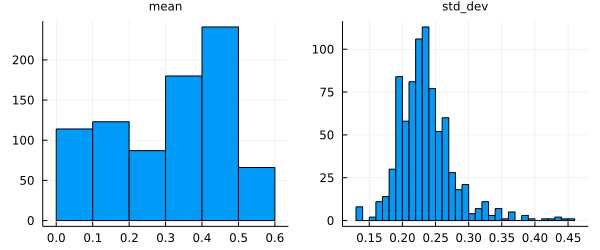

In [94]:
series = Dict(
    "mean" => mean(X, dims=2),
    "std_dev" => std(X, dims=2)
)

p = [histogram(v, title=k, label=nothing) for (k, v) in pairs(series)]
plot(p..., layout=length(series), size=(600,250), titlefontsize=8)

# 8

**Inspect the normalized data further. Plot the normalized time series with the lowest and highest mean. You should produce a plot similar to the one below.**

We'll use the base functions `argmin()` and `argmax()` to return the indices of the minimum and maximum mean.

In [97]:
function plot_min_max_series(data)
    idx_max = argmax(data)
    idx_min = argmin(data)
    p = [plot(X[s[1], :], label=nothing) for s in [idx_min, idx_max]]
    plot(p..., layout=2, size=(600,250), titlefontsize=8)
end

plot_min_max_series (generic function with 1 method)

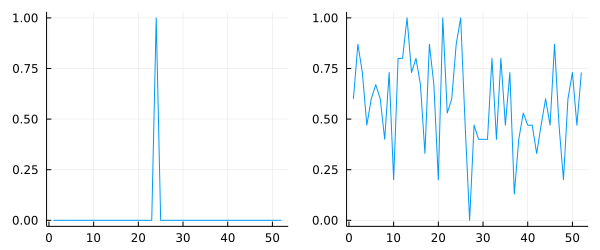

In [98]:
plot_min_max_series(series["mean"])

# 9

**Plot the normalized time series with the lowest and highest standard deviations.**


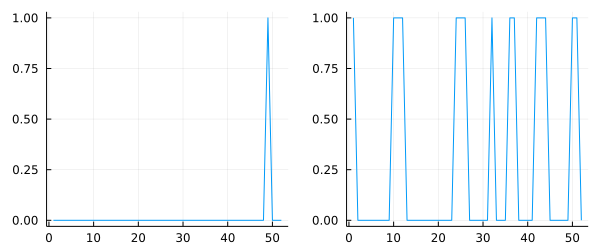

In [99]:
plot_min_max_series(series["std_dev"])

# 10

**We will want to consider another type of normalization so that data has mean of 0 and standard deviation of 1, which may be more appropriate for the clustering task. As a preliminary step keep only the W and Product_Code columns and transpose the data to place the products in columns and the weeks in rows.**

We can transpose a `DataFrame` using the [`permutedims()` function](https://dataframes.juliadata.org/stable/lib/functions/#Base.permutedims).

In [122]:
keep = ["Product_Code"]
week_cols = [c for c in names(sales) if contains(c, "W")]
append!(keep, week_cols)
sales = permutedims(sales[:, keep], 1)

,Product_Code,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102,P103,P104,P105,P106,P107,P108,P109,P110,P111,P112,P113,P114,P115,P116,P117,P118,P119,P120,P121,P122,P123,P124,P125,P126,P127,P128,P129,P130,P131,P132,P133,P134,P135,P136,P137,P138,P139,P140,P141,P142,P143,P144,P145,P146,P147,P148,P149,P150,P151,P152,P153,P154,P155,P156,P157,P158,P159,P160,P161,P162,P163,P164,P165,P166,P167,P168,P169,P170
,String,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,W0,11,7,7,12,8,3,4,8,14,22,15,3,12,14,19,30,49,40,26,13,12,8,3,36,26,14,44,34,13,46,7,15,15,47,34,41,36,37,31,41,35,42,28,34,40,27,40,29,37,12,19,40,2,41,34,31,38,32,5,37,25,12,37,34,14,35,36,14,26,31,7,26,35,8,34,27,7,39,37,38,14,10,46,29,39,37,30,41,24,42,10,26,11,14,12,31,29,4,16,13,26,34,7,4,2,11,19,0,9,9,5,31,22,7,9,13,6,16,30,37,7,7,5,4,6,3,4,36,21,19,29,39,30,32,38,39,37,36,32,28,27,23,31,9,10,7,10,3,11,4,3,11,22,12,5,1,12,8,2,9,5,13,6,9,9,7,33,34,38,29
2,W1,12,6,11,8,5,3,8,6,9,19,7,4,10,12,45,27,40,38,31,17,5,14,5,42,28,14,34,32,10,36,17,13,12,42,37,32,39,36,21,27,27,27,43,27,29,46,42,51,28,3,14,44,5,42,30,28,26,34,13,41,30,27,39,37,10,41,30,11,43,39,11,34,30,9,45,34,7,40,34,29,6,12,40,26,34,33,38,28,26,34,11,36,9,9,15,35,37,2,11,6,51,41,5,4,3,10,19,2,8,12,4,36,26,6,9,7,2,13,40,35,10,10,5,6,9,8,0,43,36,53,32,36,48,41,32,37,41,44,36,36,45,29,35,13,12,13,4,2,9,3,7,10,9,14,7,4,8,3,2,8,6,9,5,5,13,10,45,29,31,37
3,W2,10,3,8,13,13,2,3,10,10,19,15,1,9,9,47,27,40,39,45,11,9,8,4,27,33,9,33,36,12,45,6,10,11,24,26,39,43,43,28,27,26,40,40,28,39,31,27,40,42,15,17,37,6,37,42,41,37,38,10,46,32,18,54,29,9,45,38,9,46,50,10,39,36,6,37,43,6,31,45,32,13,17,34,31,28,33,35,32,44,40,7,56,10,10,15,36,36,4,9,7,45,22,7,5,3,11,15,2,8,12,7,32,31,7,12,8,3,10,46,27,8,7,3,0,5,8,2,28,44,43,32,45,29,50,36,39,43,22,32,41,40,40,29,17,9,9,9,8,9,3,8,8,11,11,4,6,14,3,9,10,5,12,6,8,9,9,42,34,22,32
4,W3,8,2,9,5,11,7,7,9,7,29,14,6,6,11,42,43,28,38,36,10,8,9,3,33,32,8,39,41,17,34,7,4,17,55,27,45,42,52,39,51,43,27,43,36,34,38,28,33,38,8,27,48,8,40,42,36,43,41,11,27,47,22,44,42,10,34,44,9,39,31,8,41,46,15,27,45,2,39,41,40,5,13,38,39,38,32,39,30,31,39,13,40,13,9,13,44,40,4,21,9,47,32,7,5,2,16,24,0,5,6,4,51,37,8,13,8,3,10,33,30,10,8,6,7,10,3,2,39,47,41,35,41,38,35,37,52,41,35,38,46,34,43,42,12,9,13,9,3,6,4,8,8,10,6,3,6,7,2,5,13,7,9,6,9,16,11,41,59,43,43
5,W4,13,7,10,9,6,6,8,6,11,20,17,4,10,13,29,29,40,39,31,7,9,17,3,40,20,9,34,31,17,35,9,13,10,42,49,38,38,61,53,37,44,32,54,50,37,40,33,43,37,12,14,28,3,29,29,45,51,24,10,51,45,19,30,31,11,50,47,5,41,37,10,39,34,4,40,28,7,44,37,29,8,14,36,28,33,36,37,33,37,47,5,31,5,5,17,36,33,7,9,9,40,36,14,3,5,16,16,3,13,15,4,39,32,10,14,7,3,16,28,31,11,11,4,4,6,5,2,41,26,39,49,43

# 11

**Normalize data as described in step 10 and drop the Product_Code information.**

We'll create a matrix `X` of values thast we can fit a `ZScoreTransform` to using the [`StatsBase.fit()` method](https://juliastats.org/StatsBase.jl/stable/transformations/#StatsBase.fit-Tuple{Type{UnitRangeTransform},AbstractArray{#s4,2}%20where%20#s4%3C:Real}) with a [`ZScoreTransform` transformer](https://juliastats.org/StatsBase.jl/stable/transformations/#Standardization-1). Once fitted, we can use the [`StatsBase.transform()` method](https://juliastats.org/StatsBase.jl/stable/transformations/#StatsBase.transform) to transform our matrix `X` with the fitted transformer `std_score`. 

*Note that the sales matrix must be converted from `Int64` to `Float64` prior to fitting the `ZScoreTransform` transformer.*

In [134]:
no_product = sales[:, Not(:Product_Code)]
X = Float64.(Matrix(no_product))
std_score = fit(ZScoreTransform, X, dims=2)
sales_norm = DataFrame(StatsBase.transform(std_score, X), names(no_product))

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102,P103,P104,P105,P106,P107,P108,P109,P110,P111,P112,P113,P114,P115
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.173811,-0.157667,-0.157667,0.256681,-0.0747971,-0.489145,-0.406275,-0.0747971,0.42242,1.08538,0.505289,-0.489145,0.256681,0.42242,0.836768,1.74833,3.32285,2.57703,1.41685,0.33955,0.256681,-0.0747971,-0.489145,2.24555,1.41685,0.42242,2.90851,2.07981,0.33955,3.07424,-0.157667,0.505289,0.505289,3.15711,2.07981,2.6599,2.24555,2.32842,1.8312,2.6599,2.16268,2.74277,1.58259,2.07981,2.57703,1.49972,2.57703,1.66546,2.32842,0.256681,0.836768,2.57703,-0.572014,2.6599,2.07981,1.8312,2.41129,1.91407,-0.323406,2.32842,1.33398,0.256681,2.32842,2.07981,0.42242,2.16268,2.24555,0.42242,1.41685,1.8312,-0.157667,1.41685,2.16268,-0.0747971,2.07981,1.49972,-0.157667,2.49416,2.32842,2.41129,0.42242,0.0909419,3.07424,1.66546,2.49416,2.32842,1.74833,2.6599,1.25112,2.74277,0.0909419,1.41685,0.173811,0.42242,0.256681,1.8312,1.66546,-0.406275,0.588159,0.33955,1.41685,2.07981,-0.157667,-0.406275,-0.572014,0.173811,0.836768,-0.737753,0.00807237,0.00807237,-0.323406,1.8312,1.08538,-0.157667,0.00807237
2,0.228459,-0.249067,0.148871,-0.0898918,-0.328655,-0.48783,-0.0898918,-0.249067,-0.0103042,0.785572,-0.169479,-0.408242,0.0692834,0.228459,2.85485,1.42227,2.45691,2.29774,1.74062,0.626397,-0.328655,0.387634,-0.328655,2.61609,1.50186,0.387634,1.97939,1.82021,0.0692834,2.13856,0.626397,0.308046,0.228459,2.61609,2.21815,1.82021,2.37732,2.13856,0.944747,1.42227,1.42227,1.42227,2.69568,1.42227,1.58145,2.93444,2.61609,3.33238,1.50186,-0.48783,0.387634,2.77526,-0.328655,2.61609,1.66104,1.50186,1.34269,1.97939,0.308046,2.5365,1.66104,1.42227,2.37732,2.21815,0.0692834,2.5365,1.66104,0.148871,2.69568,2.37732,0.148871,1.97939,1.66104,-0.0103042,2.85485,1.97939,-0.169479,2.45691,1.97939,1.58145,-0.249067,0.228459,2.45691,1.34269,1.97939,1.8998,2.29774,1.50186,1.34269,1.97939,0.148871,2.13856,-0.0103042,-0.0103042,0.467222,2.05897,2.21815,-0.567418,0.148871,-0.249067,3.33238,2.5365,-0.328655,-0.408242,-0.48783,0.0692834,0.785572,-0.567418,-0.0898918,0.228459,-0.408242,2.13856,1.34269,-0.249067,-0.0103042
3,0.0467884,-0.489813,-0.106526,0.27676,0.27676,-0.56647,-0.489813,0.0467884,0.0467884,0.736704,0.430075,-0.643127,-0.0298689,-0.0298689,2.88311,1.34996,2.34651,2.26985,2.72979,0.123446,-0.0298689,-0.106526,-0.413155,1.34996,1.80991,-0.0298689,1.80991,2.03988,0.200103,2.72979,-0.259841,0.0467884,0.123446,1.11999,1.27331,2.26985,2.57648,2.57648,1.42662,1.34996,1.27331,2.34651,2.34651,1.42662,2.26985,1.65659,1.34996,2.34651,2.49982,0.430075,0.583389,2.11654,-0.259841,2.11654,2.49982,2.42316,2.11654,2.19319,0.0467884,2.80645,1.73325,0.660047,3.41971,1.50328,-0.0298689,2.72979,2.19319,-0.0298689,2.80645,3.1130

# 12

**Make a line plot of 15 weeks of sales for the first three products from the dataset. This may give us an idea of whether the shape of the sales patterns differs between the products.**


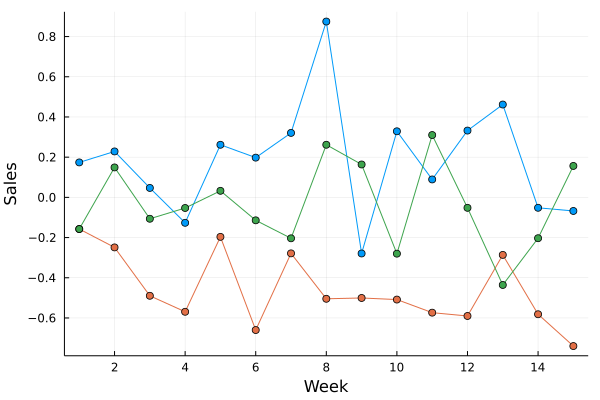

In [141]:
plot(Matrix(sales_norm[1:15, 1:3]), label=nothing, markershape=:circle, xlabel="Week", ylabel="Sales")

# 13

**Save the final dataset in Apache Arrow format.**

We use [`Arrow.write()` function](https://arrow.juliadata.org/stable/manual/#Arrow.write) to write our final dataframe to the Apache Arrow format.

In [135]:
Arrow.write("sales.arrow", sales_norm)

"sales.arrow"